NEW SCRIPT:

In [58]:
#Bibliotecas:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Reading data...
                          0     1     2     3   ...    50    51    52    53
0  Semana_epidemiológica2018     1     2     3  ...    50    51    52  Null
1                 Óbitos2018    49    42    36  ...    35    34    29  Null
2  Semana_epidemiológica2019     1     2     3  ...    50    51    52  Null
3                 Óbitos2019    44    41    45  ...    34    46    25  Null
4  Semana_epidemiológica2020     1     2     3  ...    50    51    52    53
5                 Óbitos2020    80    82    87  ...  6906  6440  6760  7779
6  Semana_epidemiológica2021     1     2     3  ...  Null  Null  Null  Null
7                 Óbitos2021  7468  6968  5418  ...  Null  Null  Null  Null

[8 rows x 54 columns]
Transposing data...
                            0  ...           7
0   Semana_epidemiológica2018  ...  Óbitos2021
1                           1  ...        7468
2                           2  ...        6968
3                           3  ...        5418
4                     

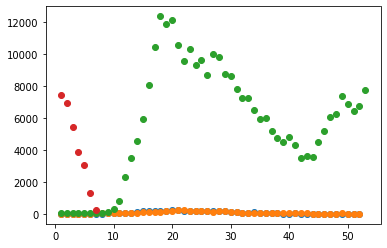

In [59]:
#Reading Brazil SRAG deaths data and formating it to a convenient dataframe format:

print('Reading data...')
srag_deaths_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid19_second_wave/data_bigdata-covid19_03_03_2021/srag_deaths_brazil.csv', header=None)
print(srag_deaths_data)

print('Transposing data...')
srag_deaths_data = srag_deaths_data.transpose()
print(srag_deaths_data)

print('Exluding row with labels from the .csv...')
srag_deaths_data.drop([0], inplace=True)
print(srag_deaths_data)

print('Reseting index...')
srag_deaths_data.reset_index(inplace=True)
print(srag_deaths_data)

print('Deleting index row...')
del srag_deaths_data['index']
print(srag_deaths_data)

print('Changing dataframe row labels...')
srag_deaths_data = srag_deaths_data.rename(columns={0: 'semana_epidemiologica_2018', 1: 'obitos_2018', 2: 'semana_epidemiologica_2019', 3: 'obitos_2019', 4: 'semana_epidemiologica_2020', 5: 'obitos_2020', 6: 'semana_epidemiologica_2021', 7: 'obitos_2021'})
print(srag_deaths_data)

print('Replacing Null strings with NaN...')
srag_deaths_data.replace('Null', np.nan, inplace=True)
print(srag_deaths_data)

print('Pre-visualizing the data...')
plt.scatter(srag_deaths_data['semana_epidemiologica_2018'], srag_deaths_data['obitos_2018'])
plt.scatter(srag_deaths_data['semana_epidemiologica_2019'], srag_deaths_data['obitos_2019'])
plt.scatter(srag_deaths_data['semana_epidemiologica_2020'], srag_deaths_data['obitos_2020'])
plt.scatter(srag_deaths_data['semana_epidemiologica_2021'], srag_deaths_data['obitos_2021'])


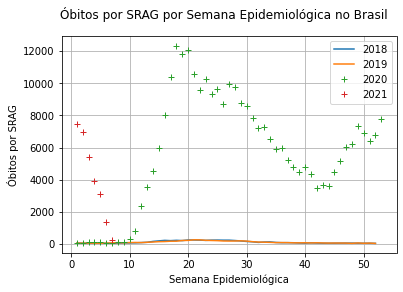

In [60]:
#Visualizing data:

plt.plot(srag_deaths_data['semana_epidemiologica_2018'], srag_deaths_data['obitos_2018'], '')
plt.plot(srag_deaths_data['semana_epidemiologica_2019'], srag_deaths_data['obitos_2019'], '')
plt.plot(srag_deaths_data['semana_epidemiologica_2020'], srag_deaths_data['obitos_2020'], '+')
plt.plot(srag_deaths_data['semana_epidemiologica_2021'], srag_deaths_data['obitos_2021'], '+')

plt.grid(True)

plt.legend(['2018', '2019', '2020', '2021'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Óbitos por SRAG por Semana Epidemiológica no Brasil')

plt.show()


Creating new columns with 2018 and 2019 data mean...
   semana_epidemiologica_2018  ... obitos_2018_2019
0                           1  ...             46.5
1                           2  ...             41.5
2                           3  ...             40.5
3                           4  ...             37.5
4                           5  ...             37.0
5                           6  ...             39.0
6                           7  ...             46.0
7                           8  ...             55.5
8                           9  ...             59.5
9                          10  ...             67.0
10                         11  ...             73.0
11                         12  ...             77.5
12                         13  ...             95.0
13                         14  ...            131.5
14                         15  ...            158.5
15                         16  ...            178.5
16                         17  ...            180.5
17         

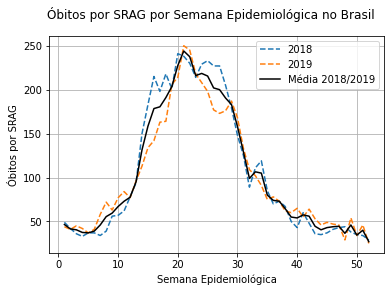

Replacing NaN with 0's...
   semana_epidemiologica_2018  ... obitos_2018_2019
0                           1  ...             46.5
1                           2  ...             41.5
2                           3  ...             40.5
3                           4  ...             37.5
4                           5  ...             37.0
5                           6  ...             39.0
6                           7  ...             46.0
7                           8  ...             55.5
8                           9  ...             59.5
9                          10  ...             67.0
10                         11  ...             73.0
11                         12  ...             77.5
12                         13  ...             95.0
13                         14  ...            131.5
14                         15  ...            158.5
15                         16  ...            178.5
16                         17  ...            180.5
17                         18  ...    

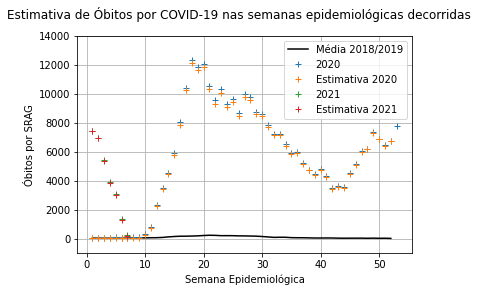

In [61]:
#Estimating COVID-19 deaths cases by the SRAG data:

print('Creating new columns with 2018 and 2019 data mean...')
srag_deaths_data['semana_epidemiologica_mean']=srag_deaths_data['semana_epidemiologica_2018']
srag_deaths_data['obitos_2018_2019']=(srag_deaths_data['obitos_2018'].astype(float)+srag_deaths_data['obitos_2019'].astype(float))/2.0
print(srag_deaths_data)

plt.plot(srag_deaths_data['semana_epidemiologica_2018'], srag_deaths_data['obitos_2018'], '--')
plt.plot(srag_deaths_data['semana_epidemiologica_2019'], srag_deaths_data['obitos_2019'], '--')
plt.plot(srag_deaths_data['semana_epidemiologica_mean'], srag_deaths_data['obitos_2018_2019'], 'k')

plt.grid(True)

plt.legend(['2018', '2019', 'Média 2018/2019'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Óbitos por SRAG por Semana Epidemiológica no Brasil')

plt.show() 

print('Replacing NaN with 0\'s...')
srag_deaths_data.replace(np.nan , 0, inplace=True)
print(srag_deaths_data)

print('Creating new columns with COVID-19 deaths estimative...')
srag_deaths_data['semana_epidemiologica_estimativa_2020']=srag_deaths_data['semana_epidemiologica_2018']
srag_deaths_data['obitos_estimativa_2020']=srag_deaths_data['obitos_2020'].astype(float)-srag_deaths_data['obitos_2018_2019'].astype(float)
srag_deaths_data['semana_epidemiologica_estimativa_2021']=srag_deaths_data['semana_epidemiologica_2018']
srag_deaths_data['obitos_estimativa_2021']=srag_deaths_data['obitos_2021'].astype(float)-srag_deaths_data['obitos_2018_2019'].astype(float)
print(srag_deaths_data)

print('Replacing 0\'s with NaN...')
srag_deaths_data = srag_deaths_data.astype(float)
srag_deaths_data[srag_deaths_data < 0] = 0
srag_deaths_data.replace(0, np.nan, inplace=True)
print(srag_deaths_data)

print('Plotting estimatives...')
plt.plot(srag_deaths_data['semana_epidemiologica_mean'], srag_deaths_data['obitos_2018_2019'], 'k')
plt.plot(srag_deaths_data['semana_epidemiologica_2020'], srag_deaths_data['obitos_2020'], '+')
plt.plot(srag_deaths_data['semana_epidemiologica_estimativa_2020'], srag_deaths_data['obitos_estimativa_2020'], '+')
plt.plot(srag_deaths_data['semana_epidemiologica_2021'], srag_deaths_data['obitos_2021'], '+')
plt.plot(srag_deaths_data['semana_epidemiologica_estimativa_2021'], srag_deaths_data['obitos_estimativa_2021'], '+')

plt.grid(True)
plt.ylim(-1000, 14000)

plt.legend(['Média 2018/2019', '2020', 'Estimativa 2020', '2021', 'Estimativa 2021'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Estimativa de Óbitos por COVID-19 nas semanas epidemiológicas decorridas')

plt.show() 


In [66]:
#Estimating parameters based on obtained data:

#(2018+2019)/2:

print('Mortes decorrentes de SRAG esperadas por ano:', srag_deaths_data['obitos_2018_2019'].sum(), '\n')

#2020:

print('Mortes decorrentes de SRAG em 2020:', srag_deaths_data['obitos_2020'].sum(), '\n')
print('Estimativa de mortes decorrentes de COVID-19 em 2020:', srag_deaths_data['obitos_2020'].sum()-srag_deaths_data['obitos_2018_2019'].sum(), '\n')
print('Óbitos confirmados por COVID-19 em 2020: 194976.0\n')
print('Estimativa de mortes por COVID-19 em 2020 que não foram catalogadas como tal:', srag_deaths_data['obitos_2020'].sum()-194976, '\n')
print('Porcentagem de mortes por COVID-19 em 2020 subnotificadas: ', (((srag_deaths_data['obitos_2020'].sum()-srag_deaths_data['obitos_2018_2019'].sum())-194976)*100)/(srag_deaths_data['obitos_2020'].sum()-srag_deaths_data['obitos_2018_2019'].sum()),'% \n')

#2021:

srag_deaths_tmp = srag_deaths_data.copy()
print(srag_deaths_tmp)
srag_deaths_tmp.dropna(inplace=True)
print(srag_deaths_tmp)

print('Mortes decorrentes de SRAG em 2021:', srag_deaths_tmp['obitos_2021'].sum(), '\n')
print('Estimativa de mortes decorrentes de COVID-19 em 2021:', srag_deaths_tmp['obitos_2021'].sum()-srag_deaths_tmp['obitos_2018_2019'].sum(), '\n')
print('Óbitos confirmados por COVID-19 em 2021: 64426.0\n')
print('Estimativa de mortes por COVID-19 em 2021 que não foram catalogadas como tal:', srag_deaths_tmp['obitos_2021'].sum()-64426.0, '\n')
print('Porcentagem de mortes por COVID-19 em 2021 subnotificadas: ', (((srag_deaths_tmp['obitos_2021'].sum()-srag_deaths_tmp['obitos_2018_2019'].sum())-64426.0)*100)/(srag_deaths_tmp['obitos_2021'].sum()-srag_deaths_tmp['obitos_2018_2019'].sum()),'% \n')

#2020+2021:

print('Mortes decorrentes de SRAG na pandemia:', srag_deaths_data['obitos_2020'].sum()+srag_deaths_tmp['obitos_2021'].sum(), '\n')
print('Estimativa de mortes decorrentes de COVID-19 na pandemia:', (srag_deaths_data['obitos_2020'].sum()-srag_deaths_data['obitos_2018_2019'].sum())+(srag_deaths_tmp['obitos_2021'].sum()-srag_deaths_tmp['obitos_2018_2019'].sum()), '\n')
print('Óbitos confirmados por COVID-19 na pandemia: 259402.0\n')
print('Estimativa de mortes por COVID-19 na pandemia que não foram catalogadas como tal:', srag_deaths_data['obitos_2020'].sum()+srag_deaths_tmp['obitos_2021'].sum()-259402.0, '\n')
print('Porcentagem de mortes por COVID-19 na pandemia subnotificadas: ',
      ((((srag_deaths_data['obitos_2020'].sum()-srag_deaths_data['obitos_2018_2019'].sum())+(srag_deaths_tmp['obitos_2021'].sum()-srag_deaths_tmp['obitos_2018_2019'].sum()))-259402.0)*100)/((srag_deaths_data['obitos_2020'].sum()-srag_deaths_data['obitos_2018_2019'].sum())+(srag_deaths_tmp['obitos_2021'].sum()-srag_deaths_tmp['obitos_2018_2019'].sum())),
      '% \n')

'''
#Quantas mortes são esperadas de SRAG por ano? (baseado em nossos dados)
mortes_esperadas_SRAG_ano = sum(media_2018_2019)

print('Mortes decorrentes de SRAG esperadas por ano:', mortes_esperadas_SRAG_ano, '\n')

#Como temos dados da epidemia de COVID-19 em 2020 apenas até a 50ª semana
#epidemiológica, calcularemos os óbitos esperados até este momento:
mortes_esperadas_SRAG_sem50 = 0.0

for i in range(0,50):
    
    mortes_esperadas_SRAG_sem50 += media_2018_2019[i]
    
print('Mortes decorrentes de SRAG até a 50ª semana epidemiológica:', mortes_esperadas_SRAG_sem50, '\n')
    
#mortes de covid até a 18ª semana epidemiológica:
mortes_estimadas_covid_19_sem50 = 0.0
    
for i in range(0,50):
    
    mortes_estimadas_covid_19_sem50 += estimativa_2020[i]
    

print('Estimativa de mortes decorrentes de COVID-19 até a 50ª semana epidemiológica:', mortes_estimadas_covid_19_sem50, '\n')
 
#Segundo os dados obtidos, há, até a 50ª semana epidemiológica, 182110 óbitos
#confirmados por COVID-19 (aproximadamente);

print('Óbitos confirmados por COVID-19 até a 50ª semana epidemiológica: 182110\n')

#logo a estimativa de óbitos que são de SRAG que não foram catalogados como
#COVID-19 são:

print('Estimativa de mortes por COVID-19 que não foram catalogadas como tal:', mortes_estimadas_covid_19_sem50-182110, '\n')

print('Porcentagem de mortes por COVID-19 subnotificadas: ', (70510*100)/252620,'% \n')
'''

Mortes decorrentes de SRAG esperadas por ano: 5405.5 

Mortes decorrentes de SRAG em 2020: 300555.0 

Estimativa de mortes decorrentes de COVID-19 em 2020: 295149.5 

Óbitos confirmados por COVID-19 em 2020: 194976.0

Estimativa de mortes por COVID-19 em 2020 que não foram catalogadas como tal: 105579.0 

Porcentagem de mortes por COVID-19 em 2020 subnotificadas:  33.93991858363304 % 

    semana_epidemiologica_2018  ...  obitos_estimativa_2021
0                          1.0  ...                  7421.5
1                          2.0  ...                  6926.5
2                          3.0  ...                  5377.5
3                          4.0  ...                  3867.5
4                          5.0  ...                  3054.0
5                          6.0  ...                  1305.0
6                          7.0  ...                   218.0
7                          8.0  ...                     NaN
8                          9.0  ...                     NaN
9          

"\n#Quantas mortes são esperadas de SRAG por ano? (baseado em nossos dados)\nmortes_esperadas_SRAG_ano = sum(media_2018_2019)\n\nprint('Mortes decorrentes de SRAG esperadas por ano:', mortes_esperadas_SRAG_ano, '\n')\n\n#Como temos dados da epidemia de COVID-19 em 2020 apenas até a 50ª semana\n#epidemiológica, calcularemos os óbitos esperados até este momento:\nmortes_esperadas_SRAG_sem50 = 0.0\n\nfor i in range(0,50):\n    \n    mortes_esperadas_SRAG_sem50 += media_2018_2019[i]\n    \nprint('Mortes decorrentes de SRAG até a 50ª semana epidemiológica:', mortes_esperadas_SRAG_sem50, '\n')\n    \n#mortes de covid até a 18ª semana epidemiológica:\nmortes_estimadas_covid_19_sem50 = 0.0\n    \nfor i in range(0,50):\n    \n    mortes_estimadas_covid_19_sem50 += estimativa_2020[i]\n    \n\nprint('Estimativa de mortes decorrentes de COVID-19 até a 50ª semana epidemiológica:', mortes_estimadas_covid_19_sem50, '\n')\n \n#Segundo os dados obtidos, há, até a 50ª semana epidemiológica, 182110 óbito

In [48]:
srag_deaths_data['obitos_2018_2019']

0      46.5
1      41.5
2      40.5
3      37.5
4      37.0
5      39.0
6      46.0
7      55.5
8      59.5
9      67.0
10     73.0
11     77.5
12     95.0
13    131.5
14    158.5
15    178.5
16    180.5
17    191.0
18    203.5
19    227.5
20    244.0
21    237.5
22    216.0
23    218.5
24    215.5
25    202.0
26    200.0
27    190.5
28    183.0
29    158.0
30    129.0
31     99.0
32    106.5
33    105.0
34     80.0
35     74.0
36     73.0
37     64.5
38     55.0
39     54.0
40     57.5
41     56.0
42     44.5
43     40.5
44     43.0
45     44.0
46     44.5
47     36.5
48     46.0
49     34.5
50     40.0
51     27.0
52      NaN
Name: obitos_2018_2019, dtype: float64

In [1]:
for i in range(4): del srag_deaths_data[i]
print(srag_deaths_data)
for i in range(7): srag_deaths_data.iloc[i][6] = srag_deaths_data.iloc[i][6]+53
print(srag_deaths_data)
tmp_dataframe=pd.DataFrame()
tmp_dataframe[0]=srag_deaths_data[6]
tmp_dataframe[1]=srag_deaths_data[7]
print(tmp_dataframe)
del srag_deaths_data[6]
del srag_deaths_data[7]
print(srag_deaths_data)
srag_deaths_data = srag_deaths_data.rename(columns={4: 0, 5: 1})
srag_deaths_data = pd.concat([srag_deaths_data, tmp_dataframe])
print(srag_deaths_data)
for i in reversed(range(len(srag_deaths_data))):
    if srag_deaths_data.iloc[i][0]=='Null':
        srag_deaths_data.drop([i], inplace=True)
print(srag_deaths_data)
original_size=len(srag_deaths_data)
for i in reversed(range(len(srag_deaths_data))):
    if i>original_size-6:
        srag_deaths_data.drop([i], inplace=True)
print(srag_deaths_data)
#convertendo semanas para dias para facilitar mais pra frente:
srag_deaths_data['semana_epidemiologica'] = srag_deaths_data['semana_epidemiologica'].astype(int).multiply(7)
print(srag_deaths_data)

plt.scatter(srag_deaths_data['semana_epidemiologica'], srag_deaths_data['casos'])


NameError: ignored

OLD SCRIPT:

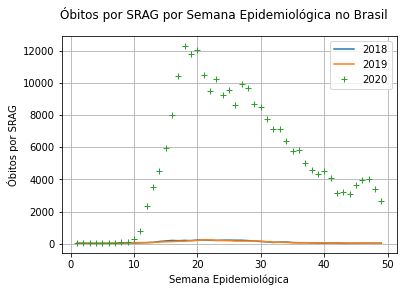

In [ ]:
#MORTES POR COVID SUBNOTIFICADAS EM 03/012020

import pandas
import numpy as np
import matplotlib.pyplot as plt

'''
PARTE 1: Visualizar os dados dos óbitos por SRAG disponíveis em :
    https://bigdata-covid19.icict.fiocruz.br/ (em 16/05/2020)
'''

#define labels
colnames = ['semana_epidemiologica', 'ano_2018', 'ano_2019', 'ano_2020']

#import CSV file
data = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/covid19_second_wave/srag_deaths_brazil.csv', names=colnames, delimiter=';')

#append the data to pyhton lists
semana_epidemiologica = data.semana_epidemiologica.tolist()
casos_2018 = data.ano_2018.tolist()
casos_2019 = data.ano_2019.tolist()
casos_2020 = data.ano_2020.tolist()

#Delete the last row because we dont have the 2020 value to the week number 51
del semana_epidemiologica[-1]
del casos_2018[-1]
del casos_2019[-1]
del casos_2020[-1]

#make some graphs
plt.plot(semana_epidemiologica, casos_2018, '')
plt.plot(semana_epidemiologica, casos_2019, '')
plt.plot(semana_epidemiologica, casos_2020, '+')

plt.grid(True)

plt.legend(['2018', '2019', '2020'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Óbitos por SRAG por Semana Epidemiológica no Brasil')

plt.show()


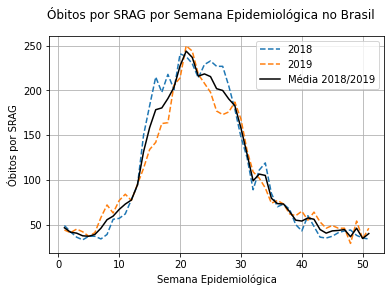

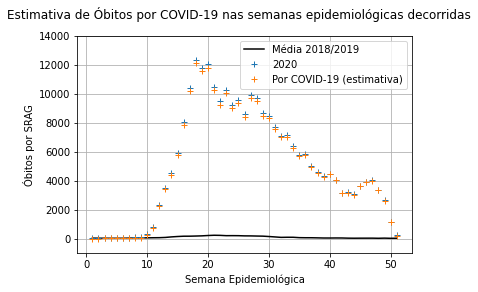

In [ ]:

'''
PARTE 2: Estimar mortes causadas por COVID-19(+problemas advindos da pandemia)
a partir dos dados anteriores:
'''

#Obter uma média anual de casos de mortes por SRAG nas semanas epidemiológicas
#dos anos anteriores:
media_2018_2019 = np.zeros(len(semana_epidemiologica))

for i in range(len(semana_epidemiologica)): 
    media_2018_2019[i] = (casos_2018[i] + casos_2019[i])/2.0
    
#gráfico comparativo de 2018, 2019 e média de 2018/2019:
plt.plot(semana_epidemiologica, casos_2018, '--')
plt.plot(semana_epidemiologica, casos_2019, '--')
plt.plot(semana_epidemiologica, media_2018_2019, 'k')

plt.grid(True)

plt.legend(['2018', '2019', 'Média 2018/2019'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Óbitos por SRAG por Semana Epidemiológica no Brasil')

plt.show()      

#Podemos então estimar o número de casos de mortes por COVID-19 subtraindo a
#média dos casos de 2020:

estimativa_2020 = np.zeros(len(casos_2020))
    
for i in range(len(semana_epidemiologica)): 
    estimativa_2020[i] = casos_2020[i] - media_2018_2019[i]

#gráfico comparativo das mortes por covid e das mortes esperadas por SARG:
plt.plot(semana_epidemiologica, media_2018_2019, 'k')
plt.plot(semana_epidemiologica, casos_2020, '+')
plt.plot(semana_epidemiologica, estimativa_2020, '+')

plt.grid(True)
plt.ylim(-1000, 14000)

plt.legend(['Média 2018/2019', '2020', 'Por COVID-19 (estimativa)'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Estimativa de Óbitos por COVID-19 nas semanas epidemiológicas decorridas')

plt.show()   


In [ ]:
'''
PARTE 3: Estimar quantos casos de morte por COVID-19 estão subnotificados
'''

#Quantas mortes são esperadas de SRAG por ano? (baseado em nossos dados)
mortes_esperadas_SRAG_ano = sum(media_2018_2019)

print('Mortes decorrentes de SRAG esperadas por ano:', mortes_esperadas_SRAG_ano, '\n')

#Como temos dados da epidemia de COVID-19 em 2020 apenas até a 50ª semana
#epidemiológica, calcularemos os óbitos esperados até este momento:
mortes_esperadas_SRAG_sem50 = 0.0

for i in range(0,50):
    
    mortes_esperadas_SRAG_sem50 += media_2018_2019[i]
    
print('Mortes decorrentes de SRAG até a 50ª semana epidemiológica:', mortes_esperadas_SRAG_sem50, '\n')
    
#mortes de covid até a 18ª semana epidemiológica:
mortes_estimadas_covid_19_sem50 = 0.0
    
for i in range(0,50):
    
    mortes_estimadas_covid_19_sem50 += estimativa_2020[i]
    

print('Estimativa de mortes decorrentes de COVID-19 até a 50ª semana epidemiológica:', mortes_estimadas_covid_19_sem50, '\n')
 
#Segundo os dados obtidos, há, até a 50ª semana epidemiológica, 182110 óbitos
#confirmados por COVID-19 (aproximadamente);

print('Óbitos confirmados por COVID-19 até a 50ª semana epidemiológica: 182110\n')

#logo a estimativa de óbitos que são de SRAG que não foram catalogados como
#COVID-19 são:

print('Estimativa de mortes por COVID-19 que não foram catalogadas como tal:', mortes_estimadas_covid_19_sem50-182110, '\n')

print('Porcentagem de mortes por COVID-19 subnotificadas: ', (70510*100)/252620,'% \n')


Mortes decorrentes de SRAG esperadas por ano: 5376.0 

Mortes decorrentes de SRAG até a 50ª semana epidemiológica: 5336.0 

Estimativa de mortes decorrentes de COVID-19 até a 50ª semana epidemiológica: 252620.0 

Óbitos confirmados por COVID-19 até a 50ª semana epidemiológica: 182110

Estimativa de mortes por COVID-19 que não foram catalogadas como tal: 70510.0 

Porcentagem de mortes por COVID-19 subnotificadas:  27.911487609848784 % 

